In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('input/test.csv')

In [4]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [5]:
# ==== Đọc dữ liệu an toàn với fallback (sửa lỗi đường dẫn) ====
from pathlib import Path
import os

WORKROOT = Path.cwd()
# Nếu chạy trong Kaggle
if os.path.exists('/kaggle/input/titanic/train.csv'):
    TRAIN_CANDS = [Path('/kaggle/input/titanic/train.csv')]
    TEST_CANDS  = [Path('/kaggle/input/titanic/test.csv')]
else:
    # Máy local theo workspace của bạn
    base = Path(r"C:\HK1-2025-2026\ML\HongPhuc_ML25_C7_K23_SGU\Lab3")
    TRAIN_CANDS = [
        WORKROOT/"input"/"train.csv",
        WORKROOT/"train.csv",
        base/"input"/"train.csv",
        base/"train.csv",
    ]
    TEST_CANDS = [
        WORKROOT/"input"/"test.csv",
        WORKROOT/"test.csv",
        base/"input"/"test.csv",
        base/"test.csv",
    ]

def read_first_exists(paths):
    for p in paths:
        if p.exists():
            return pd.read_csv(p)
    raise FileNotFoundError(f"Không tìm thấy file trong các đường dẫn: {[str(p) for p in paths]}")

# Ghi đè lại biến train/test dùng xuyên suốt notebook
train = read_first_exists(TRAIN_CANDS)
test  = read_first_exists(TEST_CANDS)
print("Loaded train/test từ:")
print("train ->", [str(p) for p in TRAIN_CANDS if p.exists()][0])
print("test  ->", [str(p) for p in TEST_CANDS if p.exists()][0])


Loaded train/test từ:
train -> c:\HK1-2025-2026\ML\HongPhuc_ML25_C7_K23_SGU\Lab3\input\train.csv
test  -> c:\HK1-2025-2026\ML\HongPhuc_ML25_C7_K23_SGU\Lab3\input\test.csv


# Data Cleaning

In [6]:
test.info(),train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

(None, None)

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S
650,651,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S


<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Handling Null Values  🚢</h3>

**The 'Cabin' column contains numerous null values, so we will drop it.**



In [9]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [10]:
train.isnull().sum()
print(train.shape)

(891, 11)


In [11]:
test.isnull().sum()
print(test.shape)

(418, 10)


In [12]:
most_common_embarked = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(most_common_embarked)

Thay thế (điền) tất cả các giá trị thiếu (NaN) trong cột Embarked của DataFrame train bằng ký tự 'S'.

In [13]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

do trong test có 1 tk ở Fare là thiếu dữ liệu, nên ta dùng mean để tính là chính xác nhất

In [14]:
print(train.shape, test.shape)

(891, 11) (418, 10)


<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Creating a Unified DataFrame for Easier Manipulation 🧑‍💻</h3>


In [15]:
df=pd.concat([train,test],sort=True).reset_index(drop=True)

tổng số cột là hợp nhất của tất cả các cột xuất hiện ở cả hai bảng.

In [16]:
df.shape

(1309, 11)

In [17]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [18]:
df.corr(numeric_only=True)['Age'].abs()

Age            1.000000
Fare           0.178314
Parch          0.150917
PassengerId    0.028814
Pclass         0.408106
SibSp          0.243699
Survived       0.077221
Name: Age, dtype: float64

In [19]:
df_Age_mean=df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
df_Age_mean

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

tuổi trung vị của từng nhóm kết hợp giữa giới tính và hạng vé (ví dụ: Nam-hạng 1, Nữ-hạng 3,...).

sắp xếp, lấy (n+1)/2= vị trí trung vị

In [20]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

điền giá trị thiếu (NaN) trong cột Age bằng tuổi trung vị của từng nhóm kết hợp giữa Sex (giới tính) và Pclass (hạng vé):

In [21]:
df.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Extracting Titles from Names and Adding as a Separate Column 📜</h3>


In [22]:
df['Title']=df['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]

tách tên 
- df['Name']: Cột chứa tên đầy đủ, ví dụ "Braund, Mr. Owen Harris".
.str.split(", ", expand=True)[1]:
- Tách chuỗi theo dấu phẩy và khoảng trắng (", "), lấy phần sau dấu phẩy (vị trí 1), ví dụ "Mr. Owen Harris".
- .str.split(".", expand=True)[0]:
- Tách tiếp theo dấu chấm, lấy phần trước dấu chấm (vị trí 0), ví dụ "Mr"

In [23]:
df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Don               1
Sir               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [24]:
df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
#những danh xưng ít gặp
df['Title'] = df['Title'].replace('Mlle', 'Miss')
# danh xưng cho nữ chưa chồng
df['Title'] = df['Title'].replace('Ms', 'Miss')
#danh xưng nữ chưa ck
df['Title'] = df['Title'].replace('Mme', 'Mrs')
#danh xưng nữ có chồng

In [25]:
df['Title'].value_counts()

Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Creating a Family Column by Combining Sibling and Parent Child Column 👨‍👩‍👧‍👦</h3>



In [26]:
df['Family_size']=df['SibSp'] + df['Parch'] + 1

tổng số thành viên của 1 gia đình trên tàu

In [27]:
df.sample(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_size
119,2.00,S,31.2750,"Andersson, Miss. Ellis Anna Maria",2,120,3,female,4,0.0,347082,Miss,7
554,22.00,S,7.7750,"Ohman, Miss. Velin",0,555,3,female,0,1.0,347085,Miss,1
644,0.75,C,19.2583,"Baclini, Miss. Eugenie",1,645,3,female,2,1.0,2666,Miss,4
329,16.00,C,57.9792,"Hippach, Miss. Jean Gertrude",1,330,1,female,0,1.0,111361,Miss,2
1007,25.00,C,6.4375,"Thomas, Mr. John",0,1008,3,male,0,NaN,2681,Mr,1
1133,45.00,C,134.5000,"Spedden, Mr. Frederic Oakley",1,1134,1,male,1,NaN,16966,Mr,3
1222,39.00,C,29.7000,"Dulles, Mr. William Crothers",0,1223,1,male,0,NaN,PC 17580,Mr,1
467,56.00,S,26.5500,"Smart, Mr. John Montgomery",0,468,1,male,0,0.0,113792,Mr,1
412,33.00,Q,90.0000,"Minahan, Miss. Daisy E",0,413,1,female,1,1.0,19928,Miss,2
132,47.00,S,14.5000,"Robins, Mrs. Alexander A (Grace Charity Laury)",0,133,3,female,1,0.0,A/5. 3337,Mrs,2


In [28]:
df.drop(columns=['Name','Parch','SibSp','Ticket'],inplace=True)

In [29]:
df.sample(10)

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
213,30.0,S,13.0000,214,2,male,0.0,Mr,1
1274,19.0,S,16.1000,1275,3,female,NaN,Mrs,2
637,31.0,S,26.2500,638,2,male,0.0,Mr,3
966,32.5,C,211.5000,967,1,male,NaN,Mr,1
1264,44.0,S,13.0000,1265,2,male,NaN,Mr,1
957,18.0,Q,7.8792,958,3,female,NaN,Miss,1
290,26.0,S,78.8500,291,1,female,1.0,Miss,1
95,25.0,S,8.0500,96,3,male,0.0,Mr,1
267,25.0,S,7.7750,268,3,male,1.0,Mr,2
1304,25.0,S,8.0500,1305,3,male,NaN,Mr,1


In [30]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [31]:
df['Family_size']=df['Family_size'].apply(family_size)


# Exploratory Data Analysis

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   object 
 6   Survived     891 non-null    float64
 7   Title        1309 non-null   object 
 8   Family_size  1309 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 92.2+ KB


In [33]:
df['Age'] = df['Age'].astype('int64')


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   int64  
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   object 
 6   Survived     891 non-null    float64
 7   Title        1309 non-null   object 
 8   Family_size  1309 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 92.2+ KB


<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Finding Survival Correlation with Every Other Column 📊</h3>

**We will analyze the correlation between survival and every other column to understand their relationships.**


In [35]:
col=['Embarked','Pclass','Sex','Title','Family_size']
for i in col:
    print('Survival Correlation by:', i)
    df2=df.groupby(i)['Survived'].mean().reset_index()
    print(df2)
    print('-'*10, '\n')

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826
---------- 

Survival Correlation by: Family_size
  Family_size  Survived
0       Alone  0.303538
1       Large  0.161290
2       Small  0.578767
---------- 



<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Adding Graphs to Clarify the Picture 📈</h3>

**We will include some visualizations to make the data and its correlations clearer.**


In [36]:
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived']==0]['Age'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived']==1]['Age'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Age Distribution by Survival',
    xaxis_title='Age',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1, 
)

fig.show()

In [37]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived'] == 0]['Fare'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived'] == 1]['Fare'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Fare Distribution by Survival',
    xaxis_title='Fare',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1,  
)

fig.show()

In [38]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived'] == 0]['Family_size'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived'] == 1]['Family_size'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Family Size Distribution by Survival',
    xaxis_title='Family Size',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1,  
)

fig.show()

In [39]:
from plotly.subplots import make_subplots
col = ['Embarked', 'Pclass', 'Sex', 'Title']

fig = make_subplots(rows=1, cols=len(col), subplot_titles=col)

for i, c in enumerate(col, start=1):
    grouped_data = df.groupby([c, 'Survived']).size().reset_index(name='Count')
    
    survived_data = grouped_data[grouped_data['Survived'] == 1]
    not_survived_data = grouped_data[grouped_data['Survived'] == 0]
    
    fig.add_trace(go.Bar(x=survived_data[c], y=survived_data['Count'], name='Survived', marker_color='green'), row=1, col=i)
    fig.add_trace(go.Bar(x=not_survived_data[c], y=not_survived_data['Count'], name='Not Survived', marker_color='red'), row=1, col=i)
    
    fig.update_xaxes(title_text=c, row=1, col=i)
    fig.update_yaxes(title_text='Count', row=1, col=i)

# Update figure layout
fig.update_layout(
    title='Countplot of Categorical Variables by Survival',
    height=400,  
    showlegend=True,
    barmode='group',  
)

# Show figure
fig.show()

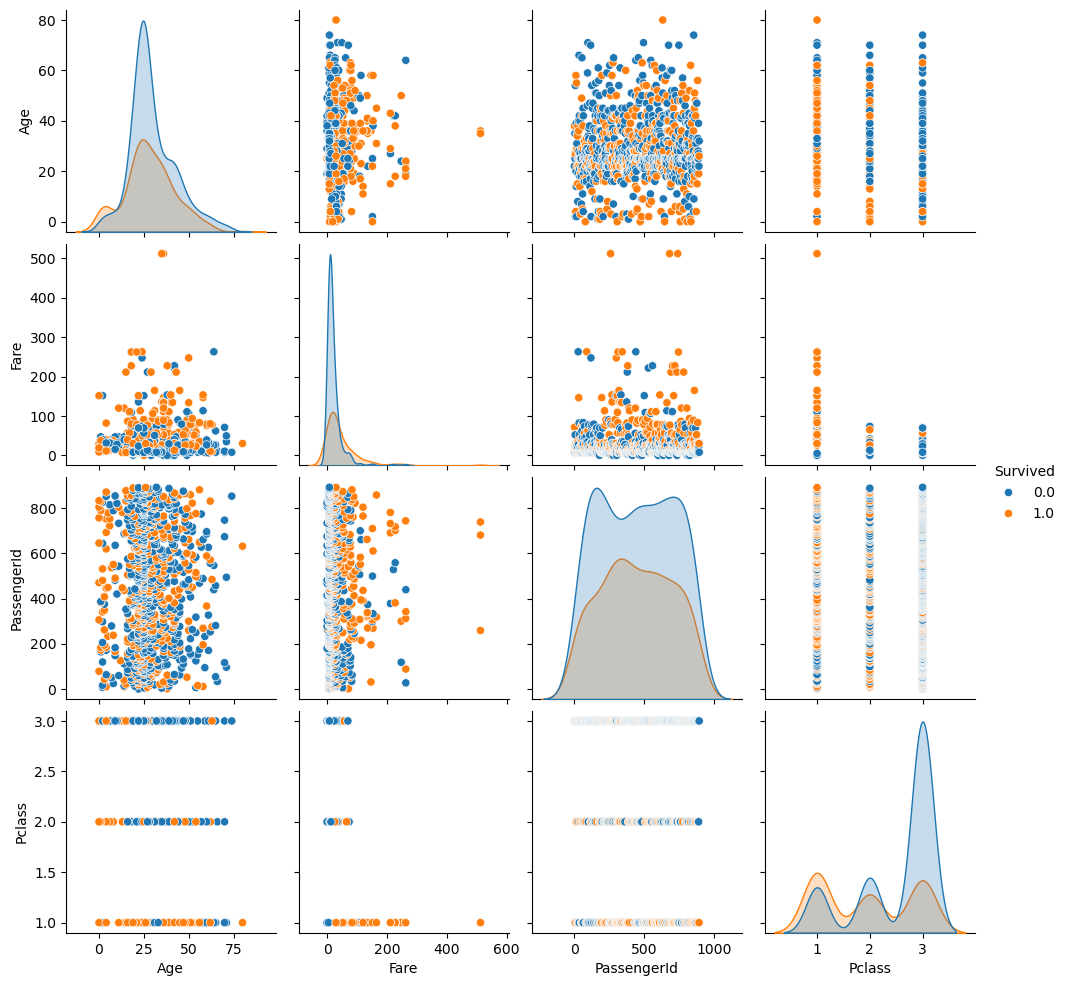

In [40]:
sns.pairplot(df,hue='Survived')

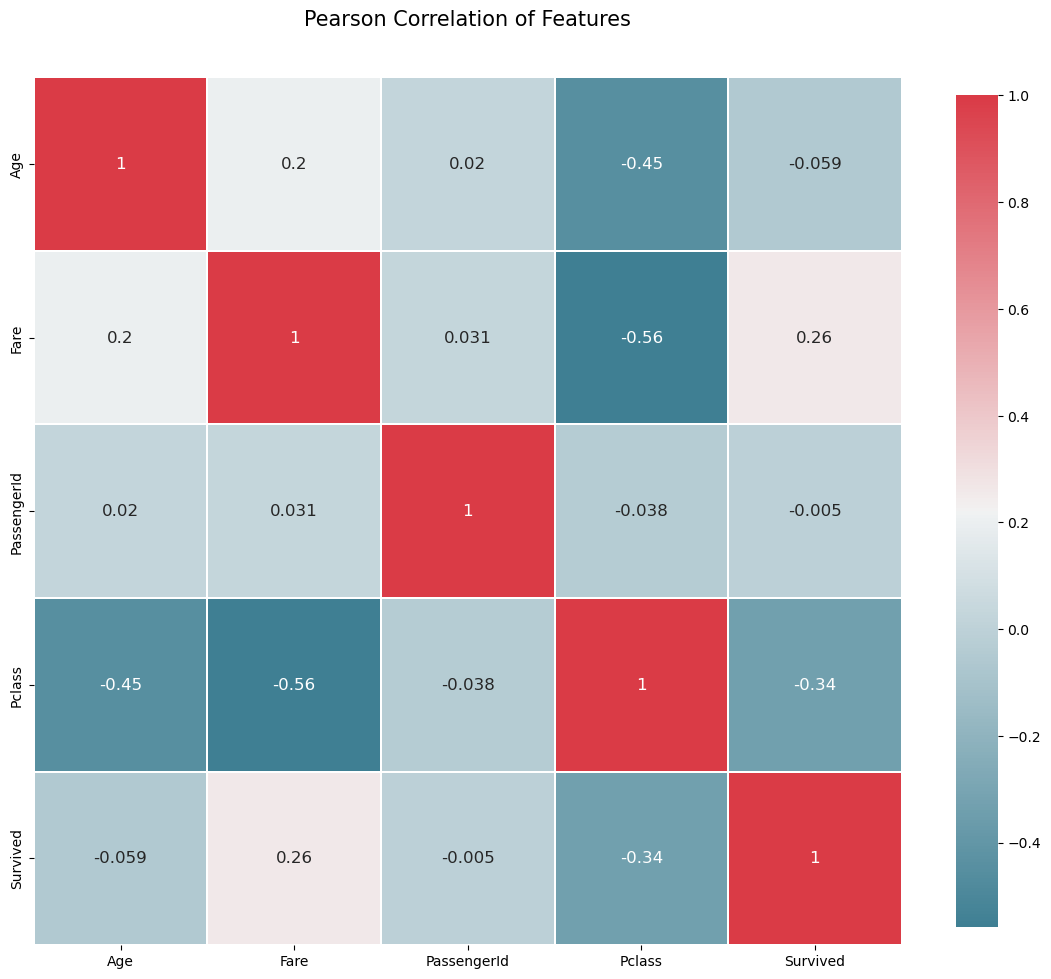

In [41]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(numeric_only=True), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)


# Feature Engineering¶

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


In [43]:
df.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0.0,Mr,Small
1,38,C,71.2833,2,1,female,1.0,Mrs,Small
2,26,S,7.9250,3,3,female,1.0,Miss,Alone
3,35,S,53.1000,4,1,female,1.0,Mrs,Small
4,35,S,8.0500,5,3,male,0.0,Mr,Alone


<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Separating the Data into Train and Test Sets 🧪</h3>

**We will divide the data into training and testing sets to evaluate the model's performance.**


In [44]:
# ...existing code...
train = df.loc[:890]
test = df.loc[891:]

# Thêm features mới
train['IsAlone'] = (train['Family_size'] == 'Alone').astype(int)
test['IsAlone'] = (test['Family_size'] == 'Alone').astype(int)

def age_group(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Elder'
train['AgeGroup'] = train['Age'].apply(age_group)
test['AgeGroup'] = test['Age'].apply(age_group)

train['Fare'] = train['Fare'].fillna(train['Fare'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
def fare_group(fare):
    if fare < 10:
        return 'Low'
    elif fare < 30:
        return 'Med'
    elif fare < 100:
        return 'High'
    else:
        return 'VeryHigh'
train['FareGroup'] = train['Fare'].apply(fare_group)
test['FareGroup'] = test['Fare'].apply(fare_group)

train['LogFare'] = np.log1p(train['Fare'])
test['LogFare'] = np.log1p(test['Fare'])
# ...existing code...

In [45]:
test.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size,IsAlone,AgeGroup,FareGroup,LogFare
891,34,Q,7.8292,892,3,male,NaN,Mr,Alone,1,Adult,Low,2.178064
892,47,S,7.0000,893,3,female,NaN,Mrs,Small,0,Adult,Low,2.079442
893,62,Q,9.6875,894,2,male,NaN,Mr,Alone,1,Elder,Low,2.369075
894,27,S,8.6625,895,3,male,NaN,Mr,Alone,1,Adult,Low,2.268252
895,22,S,12.2875,896,3,female,NaN,Mrs,Small,0,Adult,Med,2.586824


In [46]:
test.drop(columns=['Survived'],inplace=True)

In [47]:
train['Survived'] = train['Survived'].astype('int64')

In [48]:
train.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size,IsAlone,AgeGroup,FareGroup,LogFare
0,22,S,7.2500,1,3,male,0,Mr,Small,0,Adult,Low,2.110213
1,38,C,71.2833,2,1,female,1,Mrs,Small,0,Adult,High,4.280593
2,26,S,7.9250,3,3,female,1,Miss,Alone,1,Adult,Low,2.188856
3,35,S,53.1000,4,1,female,1,Mrs,Small,0,Adult,High,3.990834
4,35,S,8.0500,5,3,male,0,Mr,Alone,1,Adult,Low,2.202765


In [49]:
train.shape,test.shape

((891, 13), (418, 12))

In [50]:
train = train.drop("PassengerId", axis=1)

In [51]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

In [52]:
X_train.head()

,Age,Embarked,Fare,Pclass,Sex,Title,Family_size,IsAlone,AgeGroup,FareGroup,LogFare
0,22,S,7.2500,3,male,Mr,Small,0,Adult,Low,2.110213
1,38,C,71.2833,1,female,Mrs,Small,0,Adult,High,4.280593
2,26,S,7.9250,3,female,Miss,Alone,1,Adult,Low,2.188856
3,35,S,53.1000,1,female,Mrs,Small,0,Adult,High,3.990834
4,35,S,8.0500,3,male,Mr,Alone,1,Adult,Low,2.202765


In [53]:
X_train.shape,y_train.shape

((891, 11), (891,))

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Creating a Pipeline with Column Transformer 🔄</h3>

**We will build a pipeline that incorporates a Column Transformer to streamline preprocessing and feature engineering.**


In [54]:
num_cat_tranformation = ColumnTransformer([
    ('scaling', MinMaxScaler(), ['Age', 'Fare', 'LogFare']),
    ('onehotencolding1', OneHotEncoder(), ['Pclass', 'Sex']),
    ('onehotencolding2', OneHotEncoder(), ['Embarked', 'Title', 'Family_size', 'AgeGroup', 'FareGroup', 'IsAlone'])
], remainder='passthrough')

In [55]:
bins=ColumnTransformer([
                        ('Kbins',KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile'),[0,2]),
                        ],remainder='passthrough')

In [56]:
from sklearn import set_config
set_config(display='diagram')

In [57]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.2)
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.2)

In [58]:
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

xgb_clf = xgb.XGBClassifier(random_state=42, n_estimators=500, max_depth=5, n_jobs=-1)
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=42, n_jobs=-1)
lr_clf = LogisticRegression(random_state=42, max_iter=1000)

ensemble = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('rf', rf_clf), ('lr', lr_clf)],
    voting='soft'
)

pipe_ensemble = Pipeline([
    ('num_cat_tranformation', num_cat_tranformation),  # Đúng tên biến
    ('classifier', ensemble)
])

pipe_ensemble.fit(X_train, y_train)
y_pred_ens = pipe_ensemble.predict(X_test)

from sklearn.metrics import accuracy_score
print("Ensemble accuracy:", accuracy_score(y_test, y_pred_ens))

Ensemble accuracy: 0.8044692737430168


In [59]:
def create_pipeline(algo):
    return Pipeline([
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo)
    ])

# Model Training

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Evaluating Various Machine Learning Models to Find the Best Performer 🤖</h3>

**We will test different machine learning models to identify which one provides the best performance for our data.**


In [60]:
from sklearn import ensemble
algorithms=[
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # XGBoost
    XGBClassifier()
]

In [61]:
model_names = []
CV_Accuracy=[]
for algo in algorithms:
    pipeline = create_pipeline(algo)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    model_names.append(algo.__class__.__name__)
    CV_Accuracy.append(scores.mean())
    
#     print(f'Model: {algo.__class__.__name__}, CV Accuracy: {scores.mean()}')
#     print('\n')

  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.

In [62]:
model_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': CV_Accuracy})

In [63]:
model_df.sort_values(by='Accuracy', ascending=False, inplace=True)

<h3 style="background-color: #111; padding: 15px; font: bold 22px arial; color: lightgreen; border: 2px solid lime; border-radius: 8px">
♠ Tuning the Top 3 Machine Learning Models for Better Results 🔧</h3>

**We will focus on tuning the top 3 performing models from our data frame to enhance their performance and achieve better results.**


In [64]:
model_df

,Model,Accuracy
5,GaussianProcessClassifier,0.835694
6,LogisticRegressionCV,0.835645
0,AdaBoostClassifier,0.831449
8,RidgeClassifierCV,0.831390
19,LinearDiscriminantAnalysis,0.831390
3,GradientBoostingClassifier,0.831380
16,LinearSVC,0.827194
15,NuSVC,0.825766
21,XGBClassifier,0.818763
13,KNeighborsClassifier,0.817414


In [65]:
algo1 = ensemble.RandomForestClassifier(
    criterion='gini',
    n_estimators=1750,
    max_depth=7,
    min_samples_split=6,
    min_samples_leaf=6,
    max_features='sqrt',  # Sửa ở đây
    oob_score=True,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

algo2 =ensemble.GradientBoostingClassifier(max_depth= 1, max_features='auto', n_estimators=3, random_state=42, warm_start= True)
algo3=linear_model.RidgeClassifierCV()

In [66]:
pipe1=Pipeline([
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo1)
    ])

In [67]:
print(X_train.dtypes)
print(X_train.head())

Age              int64
Embarked        object
Fare           float64
Pclass           int64
Sex             object
Title           object
Family_size     object
IsAlone          int64
AgeGroup        object
FareGroup       object
LogFare        float64
dtype: object
     Age Embarked     Fare  Pclass     Sex Title Family_size  IsAlone  \
834   18        S   8.3000       3    male    Mr       Alone        1   
479    2        S  12.2875       3  female  Miss       Small        0   
326   61        S   6.2375       3    male    Mr       Alone        1   
98    34        S  23.0000       2  female   Mrs       Small        0   
15    55        S  16.0000       2  female   Mrs       Alone        1   

    AgeGroup FareGroup   LogFare  
834    Adult       Low  2.230014  
479    Child       Med  2.586824  
326    Elder       Low  1.979276  
98     Adult       Med  3.178054  
15     Adult       Med  2.833213  


In [68]:
print(X_train.isnull().sum())

Age            0
Embarked       0
Fare           0
Pclass         0
Sex            0
Title          0
Family_size    0
IsAlone        0
AgeGroup       0
FareGroup      0
LogFare        0
dtype: int64


In [69]:
# ...existing code...
X_train['Family_size'] = X_train['Family_size'].astype('category')
X_test['Family_size'] = X_test['Family_size'].astype('category')
# ...existing code...

In [70]:
pipe1.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    5.5s finished


Pipeline(steps=[('num_cat_transformation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', MinMaxScaler(),
                                                  ['Age', 'Fare', 'LogFare']),
                                                 ('onehotencolding1',
                                                  OneHotEncoder(),
                                                  ['Pclass', 'Sex']),
                                                 ('onehotencolding2',
                                                  OneHotEncoder(),
                                                  ['Embarked', 'Title',
                                                   'Family_size', 'AgeGroup',
                                                   'FareGroup', 'IsAlone'])])),
                ('bins',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Kbins',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=15),
                                                  [0, 2])])),
                ('classifier',
                 RandomForestClassifier(max_depth=7, min_samples_leaf=6,
                                        min_samples_split=6, n_estimators=1750,
                                        n_jobs=-1, oob_score=True,
                                        random_state=42, verbose=1))])

In [71]:
y_pred = pipe1.predict(X_test)
accuracy_score(y_test,y_pred)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 1750 out of 1750 | elapsed:    0.6s finished


0.7988826815642458

In [72]:
submission = pd.DataFrame()
submission["PassengerId"] = test["PassengerId"]
submission

,PassengerId
891,892
892,893
893,894
894,895
895,896
...,...
1304,1305
1305,1306
1306,1307
1307,1308


In [73]:
test = test.drop("PassengerId", axis=1)
test.head()

,Age,Embarked,Fare,Pclass,Sex,Title,Family_size,IsAlone,AgeGroup,FareGroup,LogFare
891,34,Q,7.8292,3,male,Mr,Alone,1,Adult,Low,2.178064
892,47,S,7.0000,3,female,Mrs,Small,0,Adult,Low,2.079442
893,62,Q,9.6875,2,male,Mr,Alone,1,Elder,Low,2.369075
894,27,S,8.6625,3,male,Mr,Alone,1,Adult,Low,2.268252
895,22,S,12.2875,3,female,Mrs,Small,0,Adult,Med,2.586824


In [ ]:
predictions = pipe1.predict(test)
submission["Survived"] =  predictions
submission.to_csv("submission.csv", index=False)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 1750 out of 1750 | elapsed:    0.9s finished


In [75]:
# ==== FE nâng cao + Stacking để tăng điểm Kaggle ====
import re
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# 1) Feature engineering nâng cao

def extract_title(name: str) -> str:
    if pd.isna(name):
        return "Unknown"
    m = re.search(r" ([A-Za-z]+)\.", str(name))
    if not m:
        return "Unknown"
    title = m.group(1)
    mapping = {
        'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
        'Lady': 'Rare', 'the Countess': 'Rare', 'Capt': 'Rare', 'Col': 'Rare',
        'Don': 'Rare', 'Dr': 'Rare', 'Major': 'Rare', 'Rev': 'Rare',
        'Sir': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare'
    }
    return mapping.get(title, title)

def engineer_features(df: pd.DataFrame, is_train: bool = True) -> pd.DataFrame:
    out = df.copy()
    # Cabin/Deck
    out['Deck'] = out['Cabin'].fillna('U').astype(str).str[0]
    # Gia đình
    out['FamilySize'] = out.get('SibSp', 0) + out.get('Parch', 0) + 1
    out['IsAlone'] = (out['FamilySize'] == 1).astype(int)
    out['FamilyCat'] = pd.cut(out['FamilySize'], bins=[0,1,3,4,20], labels=['Singleton','Small','Medium','Large'], include_lowest=True)
    # Title
    out['Title'] = out['Name'].apply(extract_title)
    # Vé
    out['TicketLen'] = out['Ticket'].astype(str).str.len()
    out['TicketFreq'] = out.groupby('Ticket')['Ticket'].transform('count')
    out['Companions'] = (out['TicketFreq'] - 1).clip(lower=0)
    # Fare per person + bins
    out['Fare'] = out['Fare'].replace(0, np.nan)
    denom = out['FamilySize'].replace(0, 1)
    out['FarePerPerson'] = out['Fare'] / denom
    out['FareCat'] = pd.qcut(out['Fare'].fillna(out['Fare'].median()), q=8, labels=False, duplicates='drop')
    # Age bins
    out['AgeBin'] = pd.cut(out['Age'], bins=[-1,5,12,18,30,45,60,80,120], labels=False)
    # Vai trò
    out['SexNum'] = (out['Sex'] == 'male').astype(int)
    out['IsChild'] = ((out['Age'] < 16).astype(float)).fillna(0).astype(int)
    out['IsMother'] = ((out['Sex'] == 'female') & (out.get('Parch', 0) > 0) & (out['Title'] != 'Miss')).astype(int)
    # Tương tác đơn giản
    if 'Pclass' in out.columns:
        out['AgeTimesClass'] = out['Age'].fillna(out['Age'].median()) * out['Pclass']
        out['FareTimesClass'] = out['Fare'].fillna(out['Fare'].median()) * out['Pclass']
    return out

# Tạo bản FE cho train/test gốc (đã có biến train, test trước đó)
train_raw = pd.read_csv('/kaggle/input/titanic/train.csv') if os.path.exists('/kaggle/input/titanic/train.csv') else pd.read_csv('input/train.csv') if os.path.exists('input/train.csv') else pd.read_csv('train.csv')
test_raw  = pd.read_csv('/kaggle/input/titanic/test.csv')  if os.path.exists('/kaggle/input/titanic/test.csv')  else pd.read_csv('input/test.csv') if os.path.exists('input/test.csv') else pd.read_csv('test.csv')
train_fe = engineer_features(train_raw, is_train=True)
test_fe = engineer_features(test_raw, is_train=False)

# Mục tiêu
y = train_fe['Survived'].astype(int)
X = train_fe.drop(columns=['Survived'])
X_submit = test_fe.copy()

# 2) Preprocess
numeric_cols = [c for c in X.columns if X[c].dtype != 'object']
categorical_cols = [c for c in X.columns if X[c].dtype == 'object']
preprocess = ColumnTransformer([
    ('num', Pipeline([
        ('imp', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_cols),
    ('cat', Pipeline([
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('oh', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_cols)
])

# 3) Base models
rf = RandomForestClassifier(n_estimators=800, max_depth=10, random_state=42, n_jobs=-1)
gx = xgb.XGBClassifier(n_estimators=900, max_depth=5, learning_rate=0.03, subsample=0.8, colsample_bytree=0.8,
                        tree_method='hist', eval_metric='logloss', n_jobs=-1, random_state=42)
gb = GradientBoostingClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, random_state=42)

pipes = [
    Pipeline([('pp', preprocess), ('mdl', rf)]),
    Pipeline([('pp', preprocess), ('mdl', gx)]),
    Pipeline([('pp', preprocess), ('mdl', gb)])
]

# 4) OOF stacking
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_list = [np.zeros(len(X)) for _ in pipes]
test_pred_list = [np.zeros(len(X_submit)) for _ in pipes]

for tr_idx, va_idx in cv.split(X, y):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]
    for i, base in enumerate(pipes):
        m = clone(base)
        m.fit(X_tr, y_tr)
        oof_list[i][va_idx] = m.predict_proba(X_va)[:, 1]
        test_pred_list[i] += m.predict_proba(X_submit)[:, 1] / cv.get_n_splits()

OOF = np.vstack(oof_list).T
TEST = np.vstack(test_pred_list).T

# 5) Meta-learner + threshold tuning
meta = xgb.XGBClassifier(n_estimators=250, max_depth=3, learning_rate=0.08, subsample=0.9, colsample_bytree=0.9,
                         tree_method='hist', eval_metric='logloss', random_state=42, n_jobs=-1)
meta.fit(OOF, y)
oof_proba = meta.predict_proba(OOF)[:, 1]

def tune_threshold(y_true, proba):
    best_thr, best_acc = 0.5, 0.0
    for thr in np.linspace(0.3, 0.7, 81):
        pred = (proba >= thr).astype(int)
        acc = (pred == y_true.values).mean()
        if acc > best_acc:
            best_acc, best_thr = acc, thr
    return best_thr, best_acc

thr, acc = tune_threshold(y, oof_proba)
print(f"OOF acc(meta): {acc:.4f} | best thr: {thr:.3f}")

# 6) Dự đoán test và xuất submission
TEST_PROBA = meta.predict_proba(TEST)[:, 1]
preds = (TEST_PROBA >= thr).astype(int)
sub = pd.DataFrame({'PassengerId': test_raw['PassengerId'], 'Survived': preds.astype(int)})
sub.to_csv('submission_stacked.csv', index=False)
print('Saved submission_stacked.csv')


ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'Small'